In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

base_path = '/mnt/disk1/heonseok/MPMLD/output'
if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [10]:
def parse_input_type(model):
    if 'original' in model:
        return 'original'
    elif 'base' in model:
        return 'base'
    elif 'type1' in model:
        return 'type1'
    elif 'type2' in model:
        return 'type2'
    elif 'type3' in model:
        return 'type3'
    elif 'type4' in model:
        return 'type4'
    elif 'type5' in model:
        return 'type5'

In [11]:
def bar_plot_class_acc(dataset, model_list):
    class_df = pd.DataFrame()
    for model in model_list:
        input_type = parse_input_type(model)
        class_path = os.path.join(base_path, dataset, 'classifier', model)
        for z_type in ['full_z', 'content_z', 'style_z']:
            for repeat in range(1):
                try:
                    class_repeat_path = os.path.join(class_path, z_type, 'repeat{}'.format(repeat))
                    class_acc = np.load(os.path.join(class_repeat_path, 'acc.npy'), allow_pickle=True).item()
                    class_df = class_df.append({'Classification accuracy': class_acc['test'], 'Input':input_type, 'z type': z_type}, ignore_index=True)

                except FileNotFoundError:
                    continue
    # sns.barplot(x='z type', y='Classification accuracy', data=class_df, hue='Input')
    sns.barplot(x='Input', y='Classification accuracy', data=class_df, hue='z type')
    plt.tight_layout()
    plt.show()
    plt.close()


In [12]:
def bar_plot_attack_acc(dataset, model_list):
    attack_df = pd.DataFrame()
    for attack_type in ['stat', 'black']:
        for model in model_list:
            input_type = parse_input_type(model)
            attack_path = os.path.join(base_path, dataset, 'attacker', model)
            for z_type in ['full_z', 'content_z', 'style_z']:
                for repeat in range(1):
                    try:
                        attack_repeat_path = os.path.join(attack_path, z_type, 'repeat{}'.format(repeat), attack_type)
                        attack_acc = np.load(os.path.join(attack_repeat_path, 'acc.npy'), allow_pickle=True)
                        if not attack_type == 'stat':
                            attack_acc = attack_acc.item()['test']
                        attack_df = attack_df.append({'Attack accuracy': attack_acc, 'Input':input_type, 'z type': z_type}, ignore_index=True)

                    except FileNotFoundError:
                        continue

        sns.barplot(x='Input', y='Attack accuracy', data=attack_df, hue='z type')
        plt.ylim(0.5, 0.7)
        plt.tight_layout()
        plt.title('{} attack'.format(attack_type), fontdict={'size': 15})
        plt.show()


In [13]:
def bar_plot_acc_from_z(dataset, model_list):
    df = pd.DataFrame()
    for model in model_list:
        input_type = parse_input_type(model)
        result_path = os.path.join(base_path, dataset, 'reconstructor', model)
        for repeat in range(1):
            try:
                repeat_path = os.path.join(result_path, 'repeat{}'.format(repeat))
                acc = np.load(os.path.join(repeat_path, 'acc.npy'), allow_pickle=True).item()
                for key, value in acc.items():
                    # acc['Recon'] = input_type
                    # print(acc)
                    df = df.append({'Accuracy': value, 'Disc':key, 'Recon': input_type}, ignore_index=True)
                # df = df.append({'Attack accuracy': attack_acc, 'Input':input_type, 'z type': z_type}, ignore_index=True)

            except FileNotFoundError:
                # print(repeat_path)
                continue

        # print(df)
    # df = df[['class_acc_full', 'class_acc_content', 'class_acc_style', 'membership_acc_full', 'membership_acc_content', 'membership_acc_style', 'Recon']]
    sns.barplot(x='Recon', y='Accuracy', data=df, hue='Disc')
    # sns.barplot(x='Input', y='Attack accuracy', data=df, hue='z type')
    # plt.ylim(0.5, 0.7)
    plt.tight_layout()
    # # plt.title('{} attack'.format(attack_type), fontdict={'size': 15})
    plt.show()


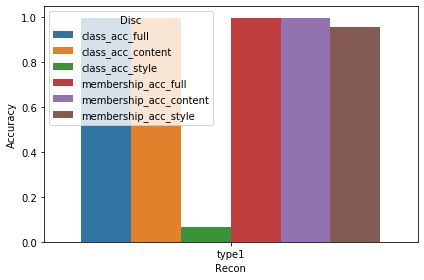

In [48]:
# bar_plot_attack_acc('location', location_model_list)
location_model_list = [
    # 'AE_z64_base_setsize2000',
    'AE_z64_type1_setsize2000',
    # 'AE_z64_type5_setsize2000',
    # 'AE_z16_type5_setsize2000',
]

bar_plot_acc_from_z('location',location_model_list)

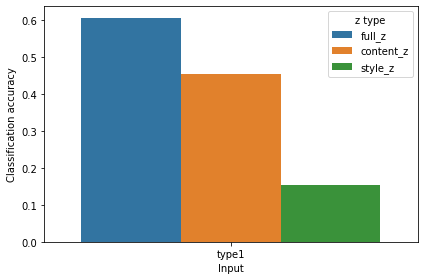

In [49]:
location_model_list = [
    # 'FCNClassifier_setsize2000_original',
    # 'FCNClassifier_setsize2000_AE_z32_base',
    # 'FCNClassifier_setsize2000_AE_z32_type1',
    # 'FCNClassifier_setsize2000_AE_z32_type2',
    # 'FCNClassifier_setsize2000_AE_z64_base',
    'FCNClassifier_setsize2000_AE_z64_type1',
    # 'FCNClassifier_setsize2000_AE_z64_type5',
    # 'FCNClassifier_setsize2000_AE_z16_type5',
]
bar_plot_class_acc('location', location_model_list)
# bar_plot_attack_acc('location', location_model_list)
